In [1]:
import torch
import tools as tl

In [2]:
batch_size = 256
train_iter, test_iter = tl.load_data_fashion_mnist(batch_size)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([256, 1, 28, 28]) torch.float32 torch.Size([256]) torch.int64


In [3]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [4]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

In [5]:
def net(X):
    return softmax(torch.matmul(X.reshape(-1, W.shape[0]), W) + b) 

In [6]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])

In [7]:
lr = 0.1

def updater(batch_size):
    return tl.sgd([W, b], lr, batch_size)

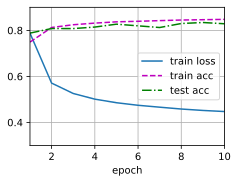

In [8]:
num_epochs = 10
tl.train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

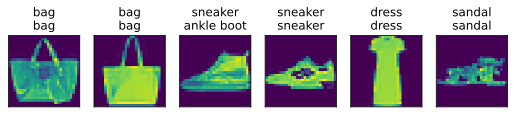

In [9]:
tl.predict_ch3(net, test_iter)